In [1]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns 

# Plotly 
import plotly.express as px 
import plotly.graph_objects as go 

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, word_tokenize


In [2]:
df = pd.read_csv('../data/processed/tanishq_data_clean_labelled.csv')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)

In [3]:
df

,Tweet,sentiment,clean_tweet,clean_tweet_token,clean_tweet_segmented
0,I hv been disappointed by the fact that Tanish...,4.0,i hv been disappointed by the fact that tanish...,i hv been disappointed by the fact that tanish...,i hv been disappointed by the fact that tanish...
1,@TanishqJewelry @RNTata2000 #EkatvamByTanishq...,4.0,ekatvambytanishq thank you so much for beautif...,ekatvambytanishq thank you so much for beautif...,ek at vam by tanishq thank you so much for bea...
2,#EkatvamByTanishq @tanishq #HappyDiwali @sayan...,4.0,ekatvambytanishq happydiwali a wonderful ad an...,ekatvambytanishq happydiwali a wonderful ad an...,ek at vam by tanishq happy diwali a wonderful ...
3,Hope @TanishqJewelry wishes d same on #NewYear...,0.0,hope wishes d same on newyearseve have u ever ...,hope wishes d same on newyearseve have u ever ...,hope wishes d same on new years eve have u eve...
4,@Ramesh_hjs @RituRathaur @HinduJagrutiOrg @rah...,10.0,this is called tanishqekatvam by ms r united n...,this is called tanishqekatvam by ms r united n...,this is called tan ishq ek atv am by ms r unit...
...,...,...,...,...,...
9422,@TanishqJewelry @AlayaF___ @NimratOfficial @Ne...,NaN,boycotttanishq,boycotttanishq,boycott tanishq
9423,Why every time same mistake #boycotttanishq,NaN,why every time same mistake boycotttanishq,why every time same mistake boycotttanishq,why every time same mistake boycott tanishq
9424,#boycotttanishq stop giving gyaan to us... Sto...,NaN,boycotttanishq stop giving gyaan to us stop ki...,boycotttanishq stop giving gyaan to us stop ki...,boycott tanishq stop giving gyaan to us stop k...
9425,"So Diwali is only buying gold, ""nice"" clothes,...",NaN,so diwali is only buying gold nice clothes par...,so diwali is only buying gold nice clothes par...,so diwali is only buying gold nice clothes par...


In [4]:
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()
df['clean_tweet_token'] = df['clean_tweet_segmented'].apply(lemmatizer.lemmatize).apply(tokenizer.tokenize)
df['clean_tweet_token'] = df['clean_tweet_token'].str.join(' ')

In [5]:
df = df[['clean_tweet_token', 'sentiment']]

In [6]:
df.dropna(inplace=True)
df = df[df['sentiment'].isin([0.0, 4.0])]

[Text(0.5, 0, 'Words'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Most frequent words')]

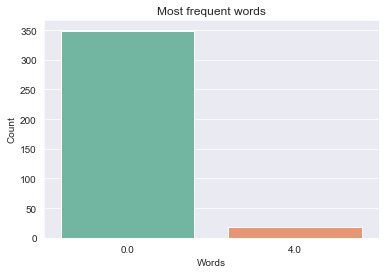

In [7]:
count_df = df.groupby('sentiment').size()
sns.set_style('darkgrid')
ax = sns.barplot(count_df.index, count_df.values, palette="Set2")
ax.set(xlabel = 'Words', ylabel='Count', title='Most frequent words')

In [8]:
count_vec = CountVectorizer()
X_count_vec = count_vec.fit_transform(df['clean_tweet_token'])
#print(count_vec.get_feature_names())


In [9]:
tfidf_vec = TfidfVectorizer()
X_tfidf_vec = tfidf_vec.fit_transform(df['clean_tweet_token'])


In [10]:
kmeans_count_vec = KMeans(n_clusters=2).fit(X_count_vec)
kmeans_tfidf_vec = KMeans(n_clusters=2).fit(X_tfidf_vec)


In [11]:
df['sentiment'] = df['sentiment'].replace({4.0: 1})

In [12]:
print(f"Cluster center for count vectorizer: {kmeans_count_vec.cluster_centers_}")

print(f"Cluster center for tfidf vectorizer: {kmeans_tfidf_vec.cluster_centers_}")

Cluster center for count vectorizer: [[0.03345725 0.         0.03345725 ... 0.00371747 0.00371747 0.00371747]
 [0.08163265 0.01020408 0.05102041 ... 0.         0.08163265 0.        ]]
Cluster center for tfidf vectorizer: [[0.00764617 0.00059249 0.00658274 ... 0.00132661 0.005938   0.00074366]
 [0.02095261 0.         0.00615076 ... 0.         0.         0.        ]]


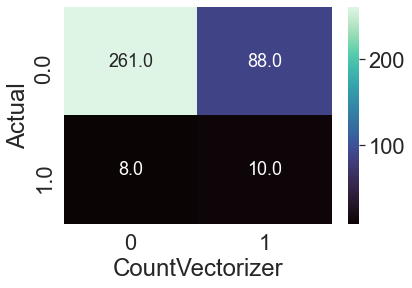

In [13]:
# Confusion matrix for countvectorizer
sns.set_style("darkgrid")
confusion_matrix_count_vec = pd.crosstab(df['sentiment'], kmeans_count_vec.labels_, rownames=['Actual'], colnames=['CountVectorizer'])
#confusion_matrix_vader.style.background_gradient()
sns.set(font_scale=2) # for label size
sns.heatmap(confusion_matrix_count_vec, 
            annot=True, 
            annot_kws={"size": 18}, 
            cmap="mako",
            fmt=".1f",) # font size
plt.show()

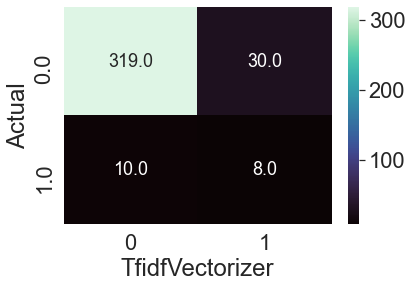

In [14]:
# Confusion matrix for tfidfvectorizer
sns.set_style("darkgrid")
confusion_matrix_tfidf_vec = pd.crosstab(df['sentiment'], kmeans_tfidf_vec.labels_, rownames=['Actual'], colnames=['TfidfVectorizer'])
#confusion_matrix_vader.style.background_gradient()
sns.set(font_scale=2) # for label size
sns.heatmap(confusion_matrix_tfidf_vec, 
            annot=True, 
            annot_kws={"size": 18}, 
            cmap="mako",
            fmt=".1f",) # font size
plt.show()

In [15]:
# Classification report for countvectorizer
print(classification_report(df['sentiment'], kmeans_count_vec.labels_))

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84       349
         1.0       0.10      0.56      0.17        18

    accuracy                           0.74       367
   macro avg       0.54      0.65      0.51       367
weighted avg       0.93      0.74      0.81       367



In [16]:
# Classification report for tfidfvectorizer
print(classification_report(df['sentiment'], kmeans_tfidf_vec.labels_))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       349
         1.0       0.21      0.44      0.29        18

    accuracy                           0.89       367
   macro avg       0.59      0.68      0.61       367
weighted avg       0.93      0.89      0.91       367



In [17]:
pca_count_vec = PCA(n_components=2).fit_transform(X_count_vec.toarray())
pca_tfidf_vec = PCA(n_components=2).fit_transform(X_tfidf_vec.toarray())

In [18]:
df_count_vec = pd.DataFrame(pca_count_vec)
df_count_vec.columns = ['X1', 'X2']
df_count_vec['labels'] = kmeans_count_vec.labels_

df_tfidf_vec = pd.DataFrame(pca_tfidf_vec)
df_tfidf_vec.columns = ['X1', 'X2']
df_tfidf_vec['labels'] = kmeans_tfidf_vec.labels_

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

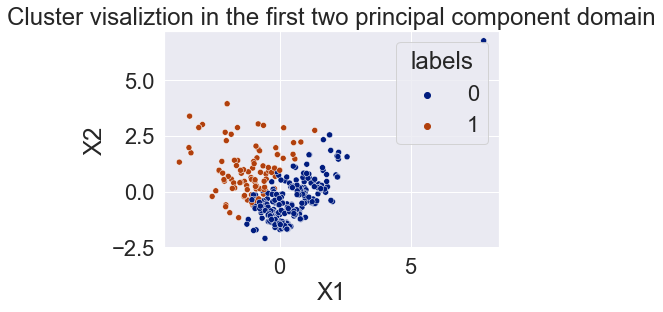

In [19]:
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_count_vec, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")


[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

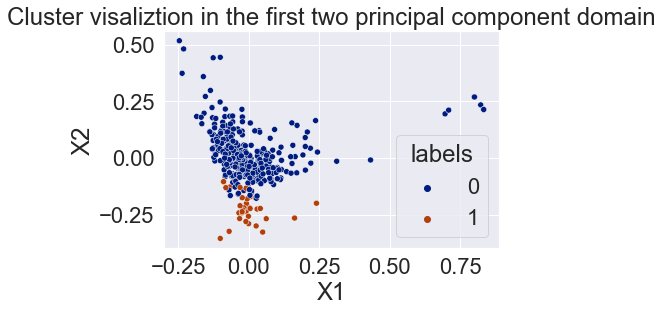

In [20]:
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_tfidf_vec, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

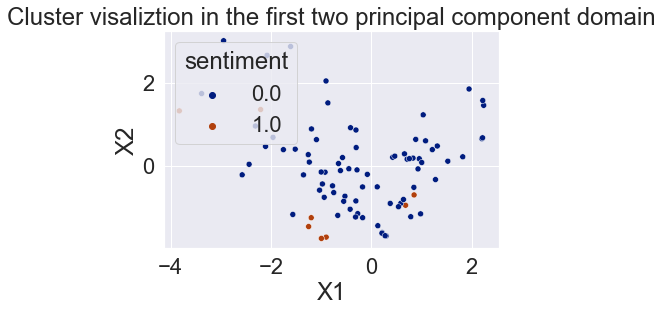

In [21]:
# With the original label
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue=df['sentiment'], 
    data=df_count_vec, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

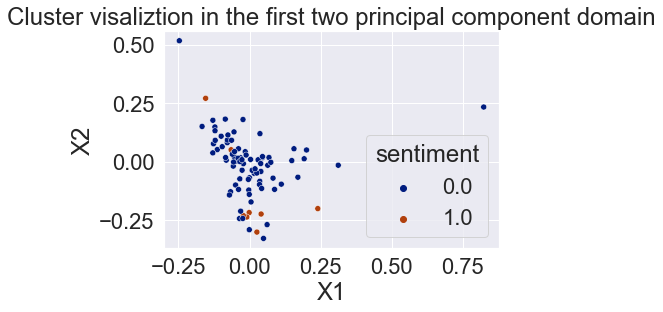

In [22]:
# With the original label
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue=df['sentiment'], 
    data=df_tfidf_vec, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")